# Worksheet 6

*   *Name: Shreejal Khatri*
*   *University ID: 2358168*


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


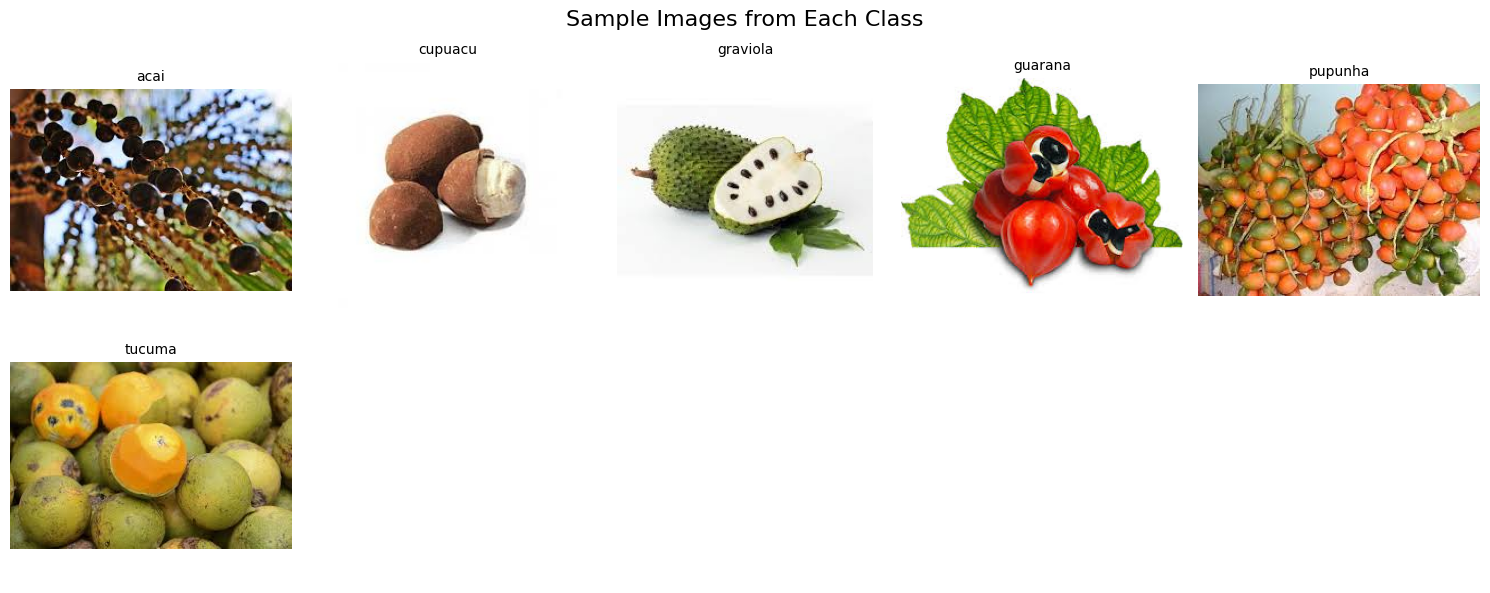

In [11]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/MLutilites/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [12]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/MLutilites/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [13]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Shreejal Khatri.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.1047 - loss: 2.0155
Epoch 1: val_loss improved from inf to 1.77387, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step - accuracy: 0.1063 - loss: 2.0399 - val_accuracy: 0.0000e+00 - val_loss: 1.7739
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.1644 - loss: 1.7525
Epoch 2: val_loss improved from 1.77387 to 1.72848, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 598ms/step - accuracy: 0.1684 - loss: 1.7545 - val_accuracy: 0.0000e+00 - val_loss: 1.7285
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.3582 - loss: 1.6547
Epoch 3: val_loss did not improve from 1.72848
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 0.3694 - loss: 1.6461 - val_accuracy: 0.0000e+00 - val_loss: 2.0525
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.1997 - loss: 1.6889
Epoch 4: val_loss improved from 1.72848 to 1.32563, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 739ms/step - accuracy: 0.2018 - loss: 1.6774 - val_accuracy: 0.7778 - val_loss: 1.3256
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.5932 - loss: 1.2826
Epoch 5: val_loss did not improve from 1.32563
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 749ms/step - accuracy: 0.6046 - loss: 1.2768 - val_accuracy: 0.2222 - val_loss: 1.7594
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.4572 - loss: 1.3214
Epoch 6: val_loss did not improve from 1.32563
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - accuracy: 0.4748 - loss: 1.3030 - val_accuracy: 0.5556 - val_loss: 1.3646
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.7668 - loss: 0.8669
Epoch 7: val_loss improved from 1.32563 to 1.29927, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 577ms/step - accuracy: 0.7556 - loss: 0.8746 - val_accuracy: 0.2778 - val_loss: 1.2993
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.7442 - loss: 0.8235
Epoch 8: val_loss improved from 1.29927 to 0.96771, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 0.7491 - loss: 0.8187 - val_accuracy: 0.7778 - val_loss: 0.9677
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8553 - loss: 0.6716
Epoch 9: val_loss improved from 0.96771 to 0.70330, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.8533 - loss: 0.6669 - val_accuracy: 0.8333 - val_loss: 0.7033
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9294 - loss: 0.3719
Epoch 10: val_loss did not improve from 0.70330
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 809ms/step - accuracy: 0.9332 - loss: 0.3703 - val_accuracy: 0.3333 - val_loss: 1.1624
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.9144 - loss: 0.3163
Epoch 11: val_loss improved from 0.70330 to 0.66060, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 763ms/step - accuracy: 0.9184 - loss: 0.3075 - val_accuracy: 0.8333 - val_loss: 0.6606
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9196 - loss: 0.2959
Epoch 12: val_loss improved from 0.66060 to 0.48146, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 514ms/step - accuracy: 0.9223 - loss: 0.2919 - val_accuracy: 0.8889 - val_loss: 0.4815
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 1.0000 - loss: 0.1212
Epoch 13: val_loss improved from 0.48146 to 0.39362, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 522ms/step - accuracy: 1.0000 - loss: 0.1187 - val_accuracy: 0.8889 - val_loss: 0.3936
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 0.0605
Epoch 14: val_loss did not improve from 0.39362
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step - accuracy: 1.0000 - loss: 0.0606 - val_accuracy: 0.8889 - val_loss: 0.4416
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 1.0000 - loss: 0.0424
Epoch 15: val_loss improved from 0.39362 to 0.35048, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 614ms/step - accuracy: 1.0000 - loss: 0.0419 - val_accuracy: 0.8889 - val_loss: 0.3505
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 1.0000 - loss: 0.0265
Epoch 16: val_loss improved from 0.35048 to 0.31186, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 836ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 0.8889 - val_loss: 0.3119
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0143
Epoch 17: val_loss improved from 0.31186 to 0.30286, saving model to Shreejal Khatri.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.8889 - val_loss: 0.3029
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0088
Epoch 18: val_loss did not improve from 0.30286
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 1.0000 - loss: 0.0090 - val_accuracy: 0.8889 - val_loss: 0.3165
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 1.0000 - loss: 0.0066
Epoch 19: val_loss did not improve from 0.30286
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 534ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.8889 - val_loss: 0.3305
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 1.0000 - loss: 0.0047
Epoch 20: val_loss did not improve from 0.30286
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8889 - val_loss: 0.3341
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 21: val_loss did not improve from 0.30286
3/3 

In [17]:
test_dir = '/content/drive/MyDrive/MLutilites/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.6667 - loss: 114.5718
Test Loss: 114.57176208496094
Test Accuracy: 0.6666666865348816


In [18]:

model.save('shreejal_khatri_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.44      0.80      0.57         5
           2       0.83      1.00      0.91         5
           3       0.80      0.80      0.80         5
           4       1.00      0.40      0.57         5
           5       0.50      0.40      0.44         5

    accuracy                           0.67        30
   macro avg       0.72      0.67      0.66        30
weighted avg       0.72      0.67      0.66        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 1.0000 - loss: 0.0106
Epoch 1: val_loss did not improve from 0.30286
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 606ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 0.8889 - val_loss: 0.3249
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 1.0000 - loss: 0.0100
Epoch 2: val_loss did not improve from 0.30286
3/3 ━━━━━━━━━━━━

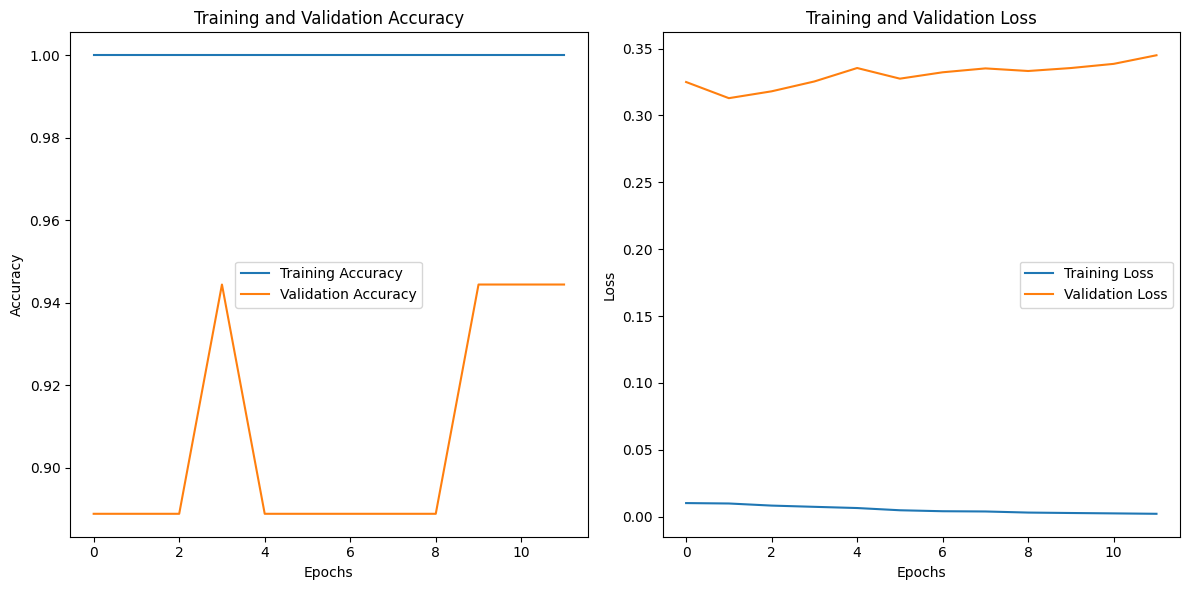

Model saved as 'shreejal_khatri_model.h5'


In [19]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('shreejal_khatri__model.h5')
print("Model saved as 'shreejal_khatri_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MLutilites/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MLutilites/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MLutilites/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/MLutilites/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1479 - loss: 2.8581 - val_accuracy: 0.1889 - val_loss: 1.8310
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.4644 - loss: 1.6663 - val_accuracy: 0.3000 - val_loss: 1.6618
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 0.6187 - loss: 1.2720 - val_accuracy: 0.2333 - val_loss: 1.6419
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step - accuracy: 0.6143 - loss: 1.2097 - val_accuracy: 0.2111 - val_loss: 1.7432
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 0.5568 - loss: 1.1823 - val_accuracy: 0.1778 - val_loss: 1.8266
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 624ms/step - accuracy: 0.7206 - loss: 0.8364 - val_accuracy: 0.1667 - val_loss: 1.9111
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 745ms/step - accuracy: 0.6125 - loss: 1.1793 - val_accuracy: 0.1778 - val_loss: 1.9725
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 801ms/step - accuracy: 0.6404 - loss: 0.9582 - val_accuracy: 0.1667 - val_loss: 2.

## Task 2: Transfer Learning using VGG16

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MLutilites/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/MLutilites/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 125s 48s/step - accuracy: 0.1799 - loss: 1.8859 - val_accuracy: 0.4111 - val_loss: 1.6679
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 113s 48s/step - accuracy: 0.4609 - loss: 1.6764 - val_accuracy: 0.4111 - val_loss: 1.5263
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 46s/step - accuracy: 0.4159 - loss: 1.5213 - val_accuracy: 0.5222 - val_loss: 1.3286
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 114s 46s/step - accuracy: 0.5278 - loss: 1.3564 - val_accuracy: 0.6778 - val_loss: 1.1687
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 137s 59s/step - accuracy: 0.6157 - loss: 1.2376 - val_accuracy: 0.6556 - val_loss: 1.0762


In [24]:
#Report
import numpy as np
from sklearn.metrics import classification_report


Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


2/3 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 18s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.12      0.13      0.12        15
     cupuacu       0.15      0.33      0.21        15
    graviola       0.07      0.07      0.07        15
     guarana       0.00      0.00      0.00        15
     pupunha       0.00      0.00      0.00        15
      tucuma       0.19      0.20      0.19        15

    accuracy                           0.12        90
   macro avg       0.09      0.12      0.10        90
weighted avg       0.09      0.12      0.10        90



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
